<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_05_04_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.필요 라이브러리 import

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

### 2. 붓꽃 데이터 로드

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 3. 데이터프레임 변환

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)


df["target"] = iris.target

cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### 4. iris data 시각화

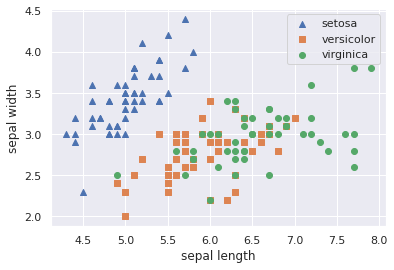

In [ ]:
# setosa: 세모 versicolor: 네모 virginica: 동그라미
markers = ["^", "s", "o"]

# 각 target 별로 다른 shape으로 시각화

for i, marker in enumerate(markers):
  x_axis_data = df[df["target"] ==i ]["sepal length (cm)"]
  y_axis_data = df[df["target"] ==i ]["sepal width (cm)"]
  plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

### 5. PCA

In [ ]:
# 개별 속성을 함께 스케일링
# PCA는 스케일링이 매우 중요

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(df.iloc[:,:-1])

In [ ]:
# n_components : PCA로 변환할 차원의 수

pca = PCA(n_components=2)

iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns = ["pca_component_1", "pca_component_2"]
iris_pca2 = pd.DataFrame(iris_pca,columns = pca_columns)
iris_pca2["target"] = iris.target
iris_pca2.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [ ]:
# 원본데이터와 pca데이터로 분류모델 실행
# 랜덤포레스트 알고리즘, 교차검증 수행

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
rf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rf, iris.data, iris.target, scoring = "accuracy", cv = 3)
print("원본 데이터 교차검증 정확도: ", scores)
print("원본 데이터 교차검증 평균 정확도: ", np.mean(scores))

원본 데이터 교차검증 정확도:  [0.98 0.94 0.96]
원본 데이터 교차검증 평균 정확도:  0.96


In [ ]:
pca_X = iris_pca2[["pca_component_1", "pca_component_2"]]
scores_pca = cross_val_score(rf, pca_X, iris.target, scoring = "accuracy", cv = 3)
print("pca 데이터 교차검증 정확도: ", scores_pca)
print("pca 데이터 교차검증 평균 정확도: ", np.mean(scores_pca))

pca 데이터 교차검증 정확도:  [0.88 0.88 0.88]
pca 데이터 교차검증 평균 정확도:  0.88


### 6. t-SNE

In [ ]:
# 데이터프레임 확인
print(df.columns)
df.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# class target 정보 제외
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components=2).fit_transform(train_df)

# array -> dataframe
tsne_df = pd.DataFrame(tsne_np, columns = ["component_1", "component_2"])

In [ ]:
tsne_df.head()

,component_1,component_2
0,21.447924,-10.877984
1,19.062082,-11.576240
2,18.696075,-10.580777
3,18.449945,-10.813488
4,21.564743,-11.226805


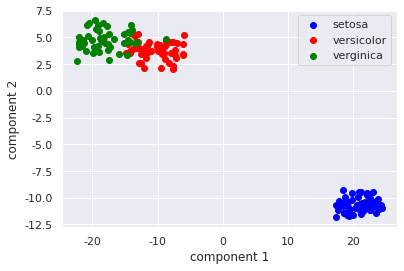

In [ ]:
# class target 정보 불러오기
tsne_df["target"] = df["target"]

# target별 분리
tsne_df_0 = tsne_df[tsne_df.target ==0]
tsne_df_1 = tsne_df[tsne_df.target ==1]
tsne_df_2 = tsne_df[tsne_df.target ==2]

# target별 시각화 
plt.scatter(tsne_df_0["component_1"],tsne_df_0["component_2"],color = "blue", label = "setosa")
plt.scatter(tsne_df_1["component_1"],tsne_df_2["component_2"],color = "red", label = "versicolor")
plt.scatter(tsne_df_2["component_1"],tsne_df_1["component_2"],color = "green", label = "verginica")

plt.xlabel("component 1")
plt.ylabel("component 2")
plt.legend()
plt.show()